In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
v0=1000.
g=10.
th=45*np.pi/180.
m=1.

In [3]:
def calc_x1_coord1(v0,th,g,t):
    return v0*cos(th)*t
def calc_x2_coord1(v0,th,g,t):
    return v0*sin(th)*t-0.5*g*t**2
def calc_x1_coord2(v0,th,g,t):
    return v0*t-0.5*g*sin(th)*t**2
def calc_x2_coord2(v0,th,g,t):
    return -0.5*g*cos(th)*t**2

## Coordinate #1

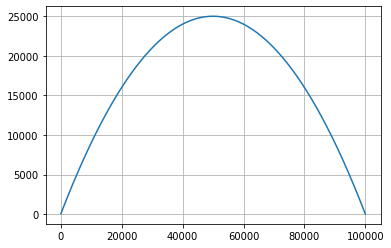

In [4]:
t=np.linspace(0,200,2000)
x1=calc_x1_coord1(v0,th,g,t)
x2=calc_x2_coord1(v0,th,g,t)

ind=x2>0
x1=x1[ind]
x2=x2[ind]
grid()
plot(x1,x2)

## Coordiante #2

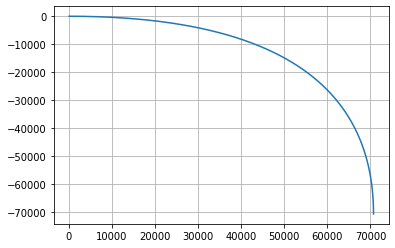

In [5]:
x1_2=calc_x1_coord2(v0,th,g,t)
x2_2=calc_x2_coord2(v0,th,g,t)

x1_2=x1_2[ind]
x2_2=x2_2[ind]

grid()
plot(x1_2,x2_2)
#plot(x1*rot,x2*rot)

## Checking

In [6]:
#th=-th
rot=np.array([[cos(-th),sin(-th)],
[-sin(-th),cos(-th)]])

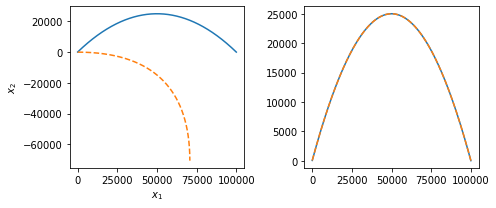

In [7]:
fig=plt.figure(figsize=(7,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.plot(x1,x2)
ax1.plot(x1_2,x2_2,'--')

xs=np.array([x1_2,x2_2]).T
xnew=np.zeros(xs.shape)
for i in range(len(xs)):
    xold=xs[i,:]
    xnew[i,:]=np.dot(rot,xold)
    
ax2.plot(xnew[:,0],xnew[:,1],label='')
ax2.plot(x1,x2,'--',label='overlapped')

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

fig.tight_layout()
fig.savefig('two_results.png',dpi=400)
fig.savefig('two_results.pdf')

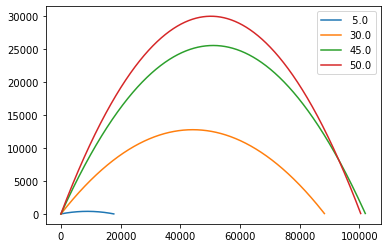

In [8]:
def calc_x1_coord1(v0,th,g,t):
    return v0*cos(th)*t
def calc_x2_coord1(v0,th,g,t):
    return v0*sin(th)*t-0.5*g*t**2


ths=[5,30,45,50]
v0=1000.
g=9.8
for th in ths:
    th=th*np.pi/180.


    t=np.linspace(0,1400,10000)
    x1=calc_x1_coord1(v0,th,g,t)
    x2=calc_x2_coord1(v0,th,g,t)

    ind=x2>-0.1
    x1=x1[ind]
    x2=x2[ind]
    grid()
    plot(x1,x2,label='%4.1f'%(th*180/np.pi))
    
gca().legend()